#### **Exploratory data analysis using supermarket sales data**

This notebook contains a detailed analysis on information that comes from a POS system \
It contains some additional information that is not in a 'pure' POS system like margin \
This is a good guide on possible questions to answer when analyzing a retail dataset without \
customer information


Dataset Link https://www.kaggle.com/aungpyaeap/supermarket-sales

Read this document https://towardsdatascience.com/exploratory-data-analysis-using-spermarket-sales-data-in-python-e99d329a07fc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Other Libraries

# Visualization

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Calendar

import calendar

import folium
from folium import plugins

# Plotly Options and Config

pio.templates.default = 'plotly_white'
config = {'displayModeBar': False}
colors_x = ['#E0C95A', '#CBE0CA', '#E0864E', '#CDCCE3', '#E3B8D1']
cmaps = 'Blues'

In [3]:
df = pd.read_csv('./data/supermarket_POS_data.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
city_data = df.City.unique()
type(city_data)

numpy.ndarray

#### **Locating branches in a map**
Map figure with the branches

In [5]:
city_data = df.City.unique()
cities = pd.DataFrame(data = city_data, columns = ['city_name'])
cities

cities = pd.DataFrame({'city_name': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.79671316,19.690708,21.981275],
                       'Longitude' : [96.160992, 96.165883, 96.082375]})

supermarket_geo = folium.Map(location = [19.680708,	96.265883], zoom_start = 7, tiles = 'CartoDB Positron', control_scale = True)

for (index, row) in cities.iterrows():
  folium.Marker(location = [row.loc['Latitude'], row.loc['Longitude']], popup = row.loc['city_name'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(supermarket_geo)

supermarket_geo

#### **Fixing Dates in the dataframe**
Transforms a column with date into pd.datetime dtype and then you can perform selections by dattes

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] = df['Date'].dt.day_name()
df.set_index('Date', inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


#### **Some questions on the data. One question leads to another**

#### **Q1: What does the customer rating look like and is it skewed?**

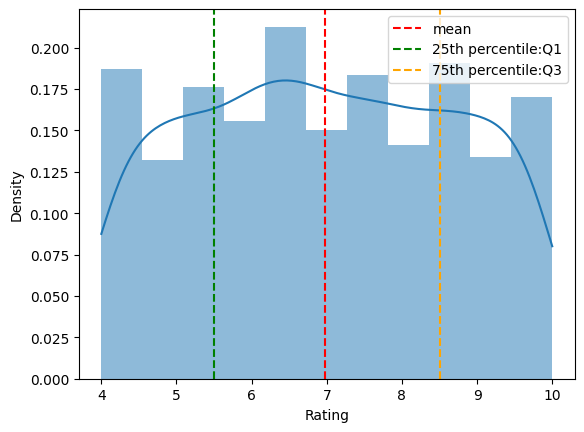

In [7]:
import warnings 
#warnings.filterwarnings("ignore")
sns.histplot(df['Rating'],kde=True, stat="density", linewidth=0)
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

#### The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. We can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th quartiles respectively.The mean rating is ~7 across products.

#### **Q2: Is there any difference in aggregate sales across branches?**

<Axes: xlabel='Branch', ylabel='count'>

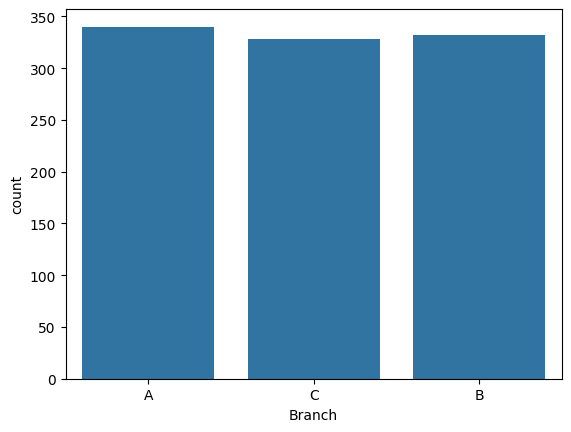

In [8]:
sns.countplot(x="Branch", data = df)

In [9]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

#### There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches.

#### **Q3: Which is the most pouplar payment method used by customers?**

<Axes: xlabel='Payment', ylabel='count'>

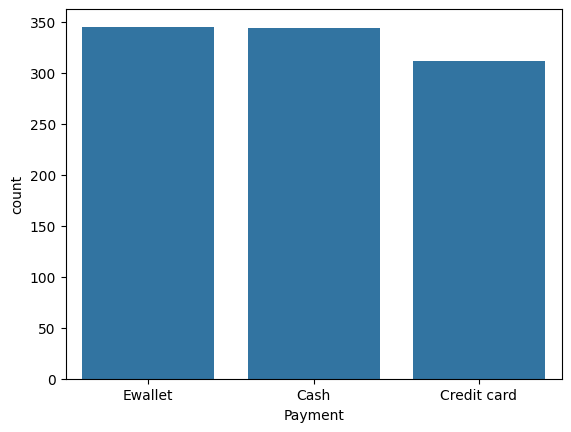

In [10]:
sns.countplot(x= "Payment", data= df)

#### The most popular payment method is in-fact E-wallet and not credit cards.

###  Bi-variate analysis

#### **Q4: Does gross income affect the ratings that the customers provide?**

<Axes: xlabel='Rating', ylabel='gross income'>

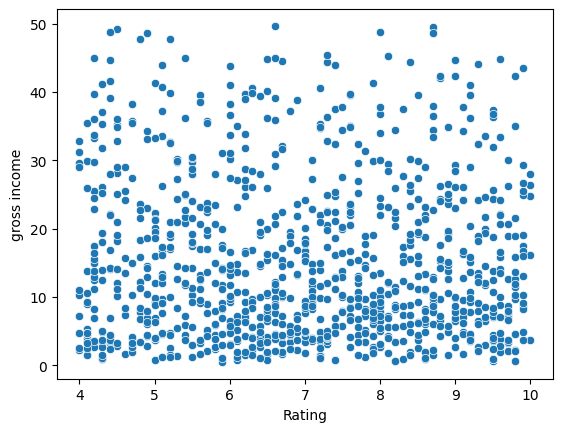

In [11]:
sns.scatterplot(x= 'Rating', y= 'gross income', data=df)

<Axes: xlabel='Rating', ylabel='gross income'>

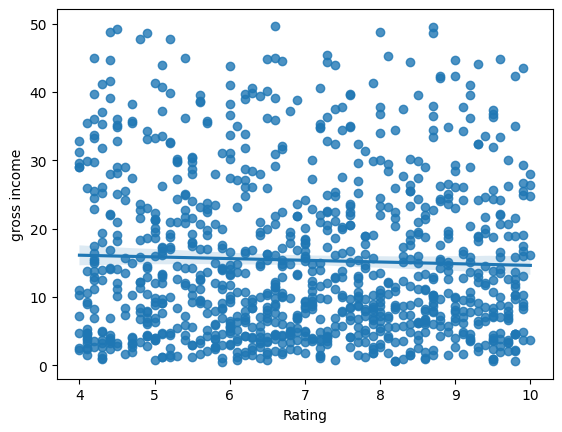

In [12]:
sns.regplot(x='Rating', y='gross income', data=df)

#### There is no relationship between gross income and customer rating

#### **Q5: Which branch is the most profitable?**

<Axes: xlabel='Branch', ylabel='gross income'>

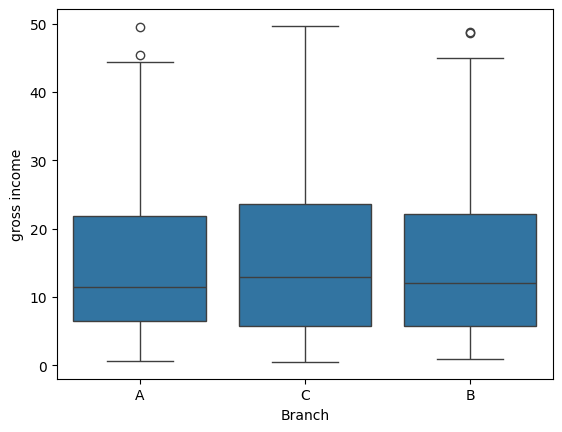

In [13]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

#### There is not much difference in gross income by branches at an average level. Branch C has a slightly higher income than A or B, As observed earlier, though branch A has slightly higher sales than the rest C is the most profitable branch in terms of gross income.

#### **Q6: What is the relationship between Gender and Gross income?**

<Axes: xlabel='Gender', ylabel='gross income'>

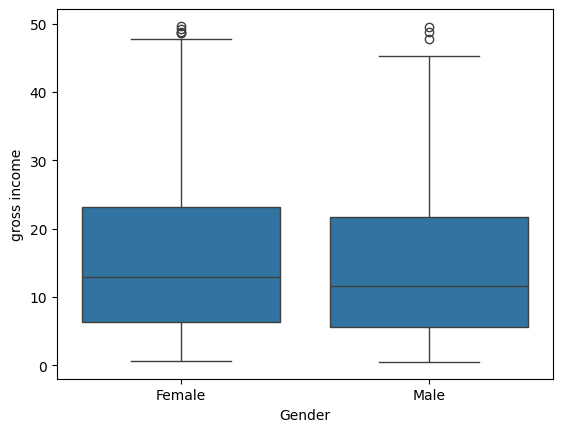

In [14]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.

#### **Q7: Is there any time trend in gross income?**

In [15]:
df.groupby('Date').mean(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


There are multiple dates per customers, so we have to summarize the data. We will use date as the index for this and for summarization we will use mean value of the variables. We get 89 rows i.e 89 unique days of data across all customers

<Axes: xlabel='Date', ylabel='gross income'>

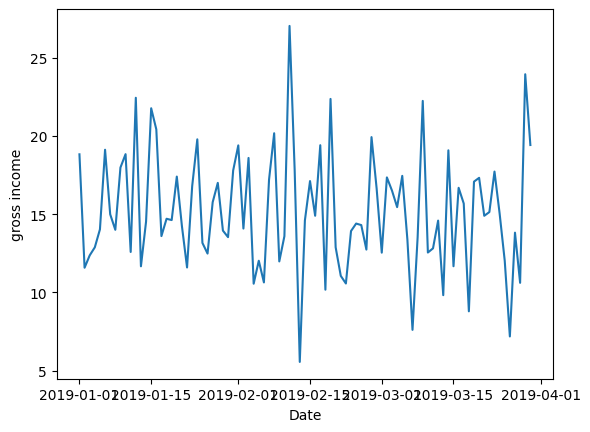

In [16]:
sns.lineplot(x= df.groupby(df.index).mean(numeric_only=True).index, 
             y = df.groupby(df.index).mean(numeric_only=True)['gross income'])

No particular time trend except for some days the gross income is pretty high and some days it is pretty low. Overall it remains at a certain average level.¶

#### **Q8: Which product line generates most income?**

<Axes: xlabel='Product line', ylabel='gross income'>

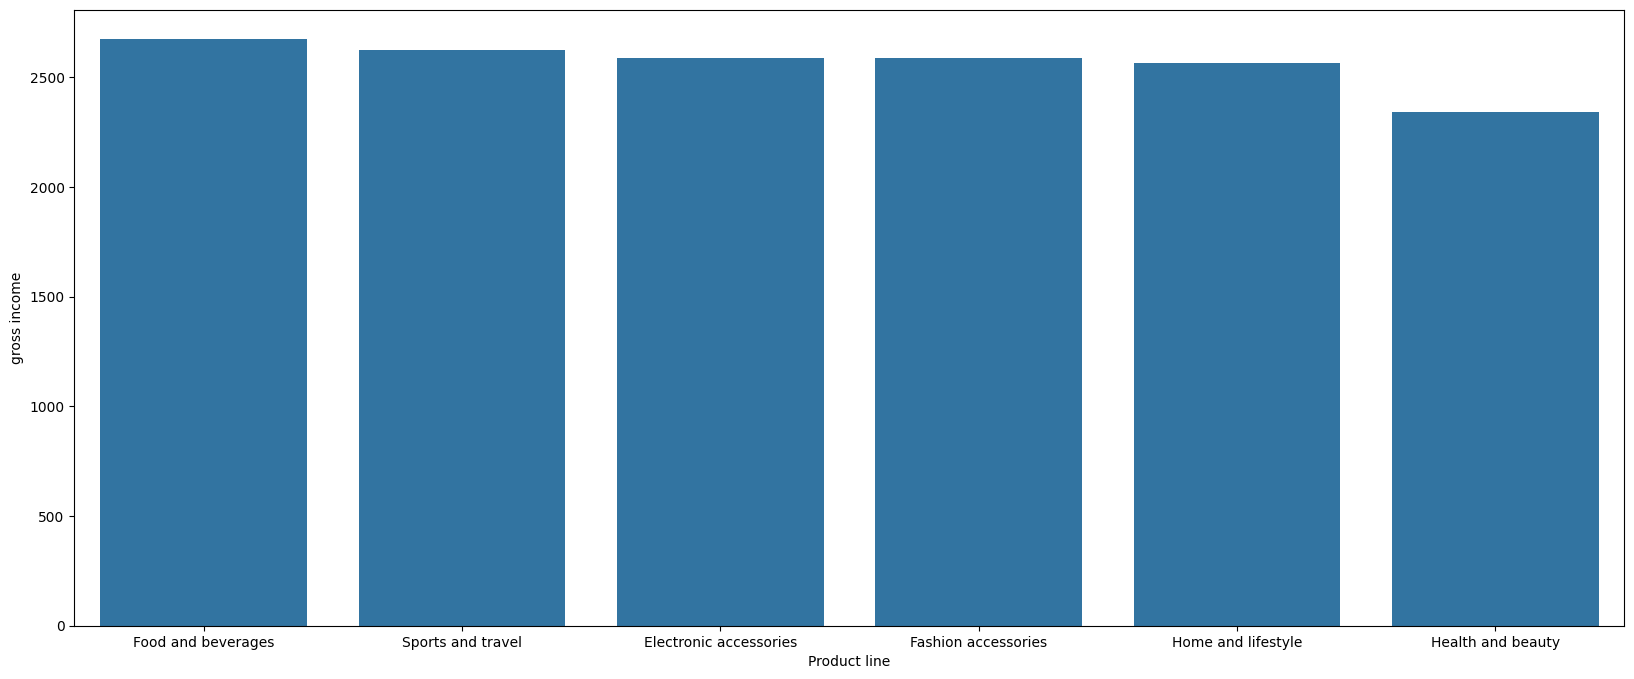

In [17]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

Gross income is highest in sports and travel.

#### **Correlation analysis**
This is an important part of the analysis to see the relationships between the different features of the file

In [18]:
# Individual analysis
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

In [19]:
#pairwise analysis
np.round(df.corr(numeric_only=True),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


### Visualize correlations

<Axes: >

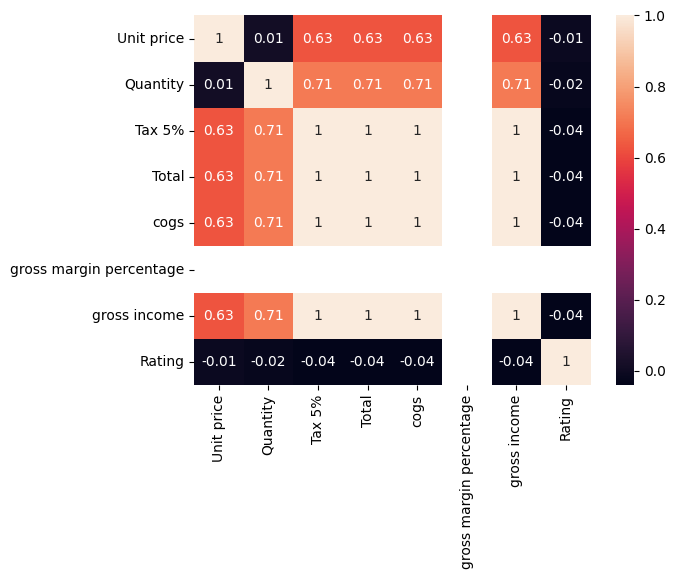

In [20]:
sns.heatmap(np.round(df.corr(numeric_only=True),2), annot=True)

#### **Gender spending pattern analysis**

<Axes: title={'center': 'Total Monthly transaction by Gender'}, xlabel='Product line', ylabel='count'>

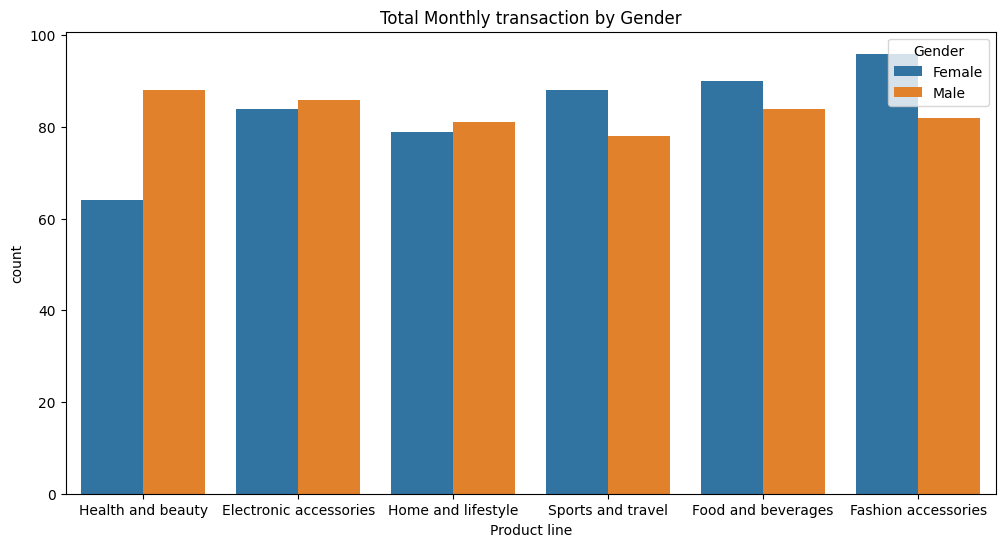

In [21]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df,x = 'Product line', hue = 'Gender')

#### Females spend on 'fashion accessories' the most and for males surprisingly it is 'Health and beauty'. Females also spend more on 'Sports and travel'.

#### **Dummy method**
Using the dummy method to perform this analysis Dummies = columns with True and False
Other methods can be used as well for this type of analysis

In [22]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
Date,,
2019-01-05,True,False
2019-03-08,True,False
2019-03-03,False,True
2019-01-27,False,True
2019-02-08,False,True


#### Join the Gender dummies with the original data

In [23]:
df1 = pd.concat([df, gender_dummies], axis = 1)
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,Female,Male
Date,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,True,False
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,True,False
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,False,True
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,False,True
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,False,True


#### **Female spending patterns**

<Axes: xlabel='Product line', ylabel='Female'>

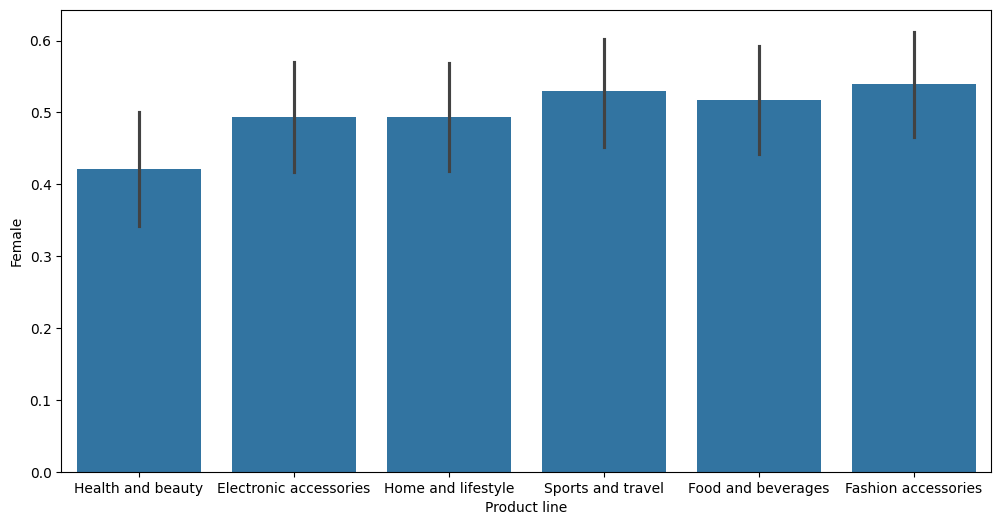

In [24]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = df1)

#### **Males spending pattern**

<Axes: xlabel='Product line', ylabel='Male'>

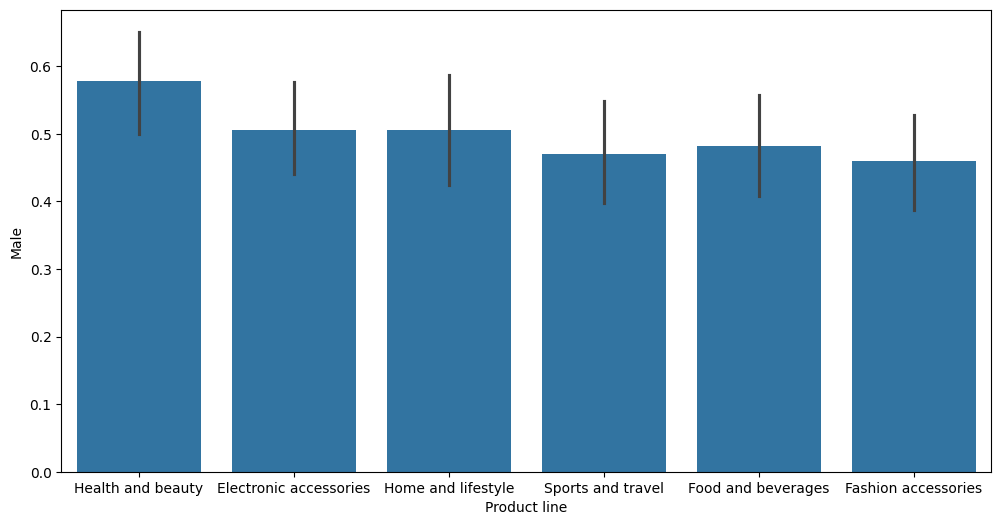

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Male', data = df1)

#### **Question 10: How many products are bought by customers?**

([<matplotlib.axis.XTick at 0x7fd737ef2210>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

<Figure size 1200x600 with 0 Axes>

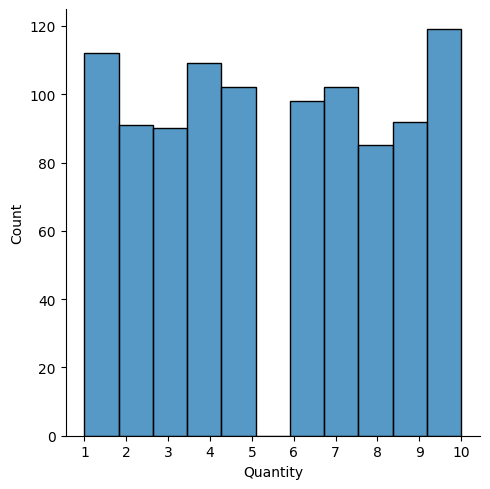

In [26]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.displot(df['Quantity'])
plt.xticks(xdata)

#### Most of the customers buy 10 quantities

#### **Q11: Which day of the week has maximum sales?**

<Axes: title={'center': 'Daily Sales by Day of the Week'}, xlabel='count', ylabel='weekday'>

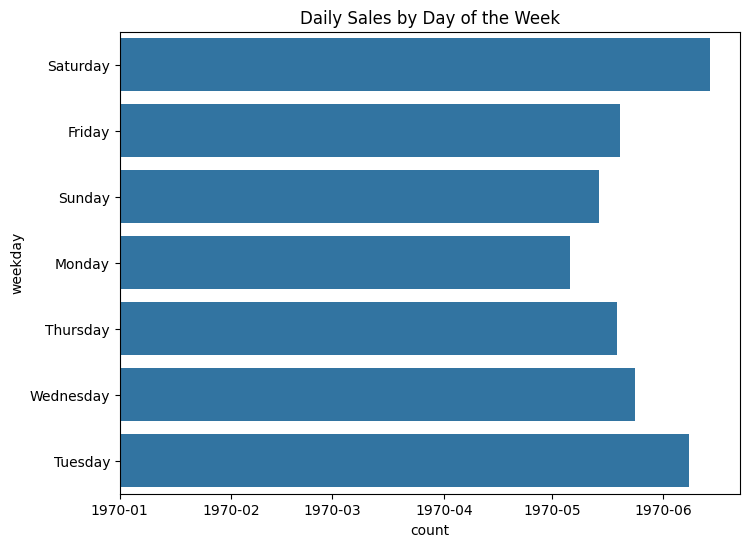

In [27]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['weekday'])

#### Sales is highest on Saturdays probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales.

#### **Q12: Which hour of the day is the busiest?**

In [28]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

/tmp/ipykernel_43055/2169082730.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int32)

Text(0.5, 1.0, 'Product Sales per Hour')

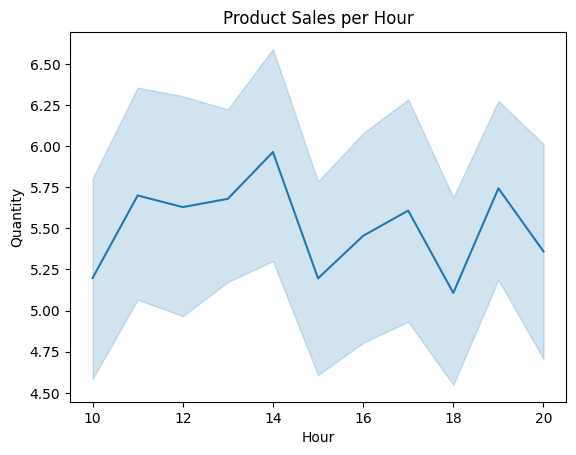

In [29]:
df = df.reset_index()
sns.lineplot(x="Hour",  y = 'Quantity', data =df).set_title("Product Sales per Hour")

#### Peak is observed in the 14th hour i.e 2 pm of the day. Hence, sales is typically higher in the afternoons.

#### **Question 13: Which product line should the supermarket focus on?**

#### **a) Rating of products**

([<matplotlib.axis.XTick at 0x7fd737f3a240>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

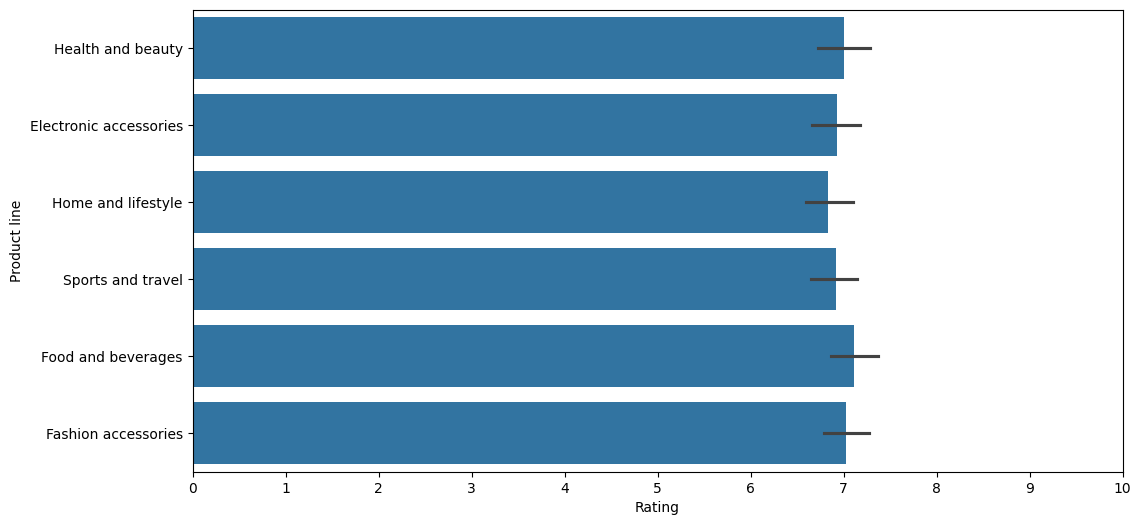

In [30]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Product line'], x = df['Rating'])
plt.xticks(xdata)

#### **b) Quantity purchased by product**

<Axes: xlabel='Quantity', ylabel='Product line'>

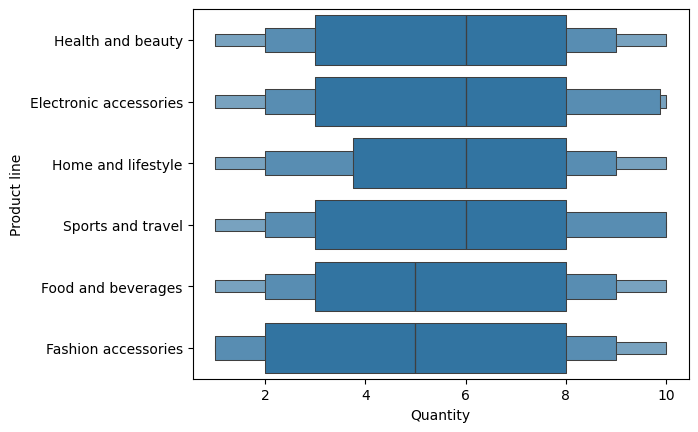

In [31]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

#### Though the rating for 'fashion accessories' and 'food and beverages' is high but quantity purchased is low. Hence, supply for these products need to be increased.

### Q14: Which city should be chosen for expansion and which products should it focus on?

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

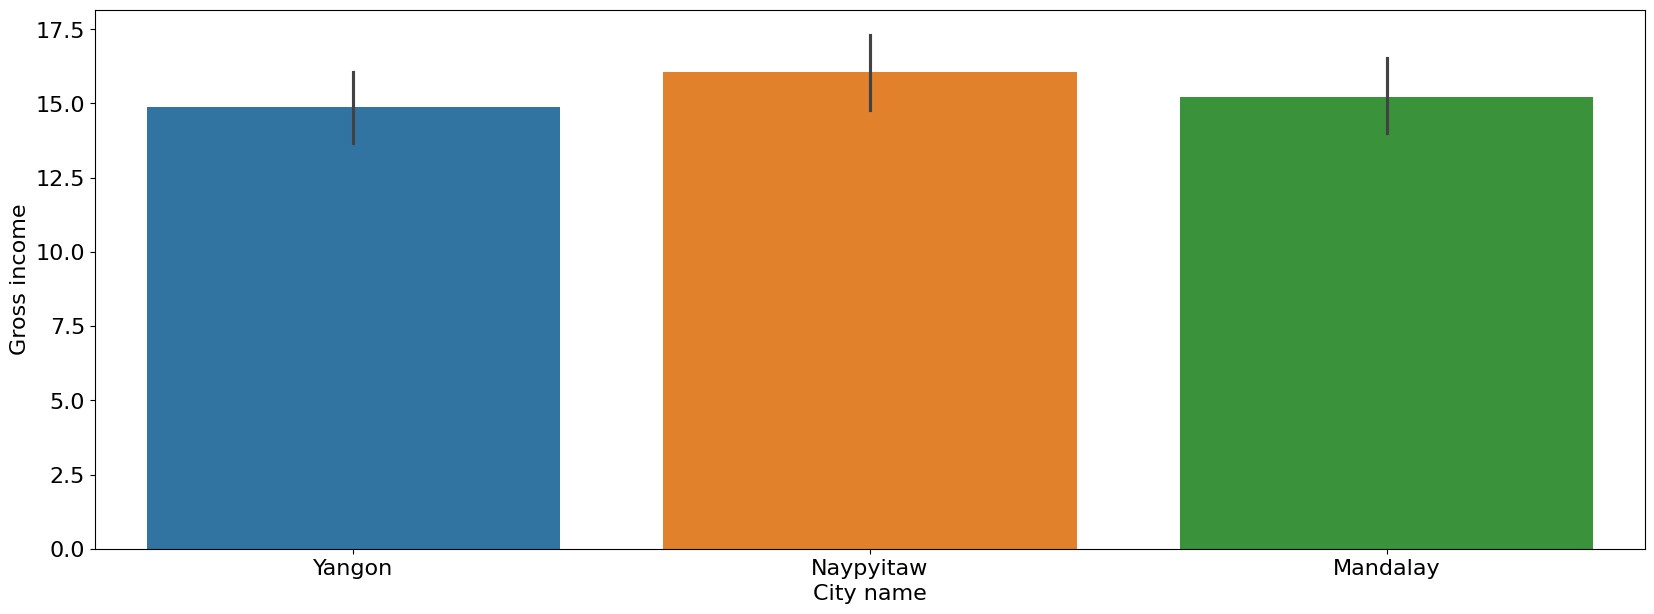

In [32]:
plt.figure(figsize=(20,7))
sns.barplot(df, x='City', y ='gross income', hue = 'City', legend = False)
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')

#### It is obvious that Naypyitaw is the most profitable city, hence the expansion plan should be based on this city.

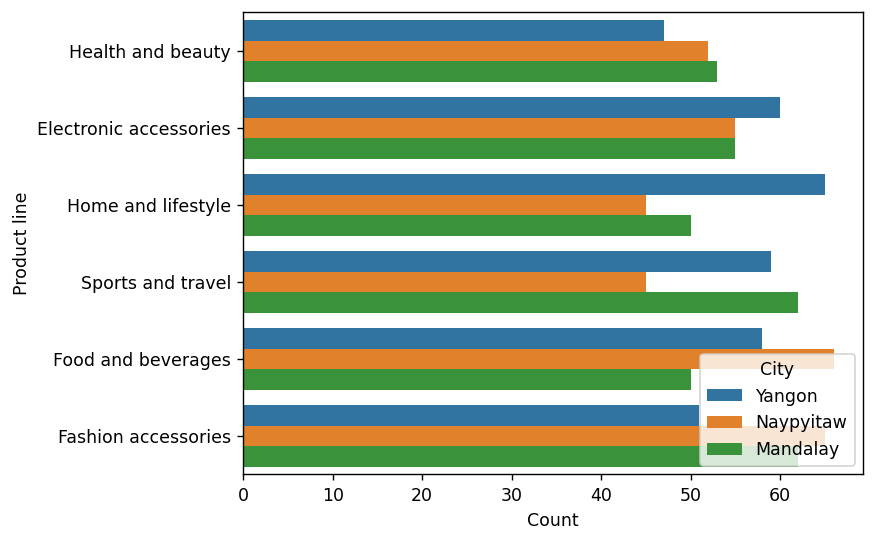

In [33]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.show()

#### Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.

#### **Epilogue**
This step allows you to reproduce the notebook in a new environment.
It checks which are the package versions used in the analysis

In [36]:
import session_info
session_info.show(html=False)

-----
folium              0.17.0
matplotlib          3.9.1
numpy               1.26.4
pandas              2.2.2
plotly              5.23.0
seaborn             0.13.2
session_info        1.0.0
-----
IPython             8.26.0
jupyter_client      8.6.2
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Sep 11 2024, 14:17:37) [GCC 13.2.0]
Linux-5.15.153.1-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2024-10-13 18:46
